<a href="https://colab.research.google.com/github/IagoAlmeida-ias/Python-para-Data-Science/blob/main/Desafios2_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Pacote de visualização de Dados

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('vendas_ficticias.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5000 non-null   int64         
 1   produto            5000 non-null   object        
 2   categoria          5000 non-null   object        
 3   preco              5000 non-null   float64       
 4   quantidade         5000 non-null   int64         
 5   dt_venda           5000 non-null   datetime64[ns]
 6   vendedor           5000 non-null   object        
 7   preco_cus          5000 non-null   float64       
 8   valor_final        5000 non-null   float64       
 9   marguem_lucro      5000 non-null   float64       
 10  margem_lucro       5000 non-null   float64       
 11  perc_margem_lucro  5000 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 468.9+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,ID,Produto,Categoria,Preço,Quantidade,Data_Venda,Vendedor
0,1,Produto C,Categoria 3,'27.82',19,2023-01-01,Vendedor 1
1,2,Produto A,Categoria 1,49.42,14,2023-01-02,Vendedor 3
2,3,Produto C,Categoria 3,46.79,13,2023-01-03,Vendedor 2
3,4,Produto C,Categoria 1,48.6,15,2023-01-04,Vendedor 3
4,5,Produto A,Categoria 3,62.7,16,2023-01-05,Vendedor 1


In [ ]:
df.tail()

,ID,Produto,Categoria,Preço,Quantidade,Data_Venda,Vendedor
4995,4996,Produto A,Categoria 3,44.46,15,2036-09-04,Vendedor 2
4996,4997,Produto B,Categoria 1,57.38,9,2036-09-05,Vendedor 3
4997,4998,Produto C,Categoria 2,71.05,7,2036-09-06,Vendedor 1
4998,4999,Produto B,Categoria 2,35.76,16,2036-09-07,Vendedor 2
4999,5000,Produto A,Categoria 3,32.69,3,2036-09-08,Vendedor 3


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.describe().round(1)

,ID,Quantidade
count,5000.0,5000.0
mean,2500.5,10.1
std,1443.5,5.5
min,1.0,1.0
25%,1250.8,5.0
50%,2500.5,10.0
75%,3750.2,15.0
max,5000.0,19.0


In [ ]:
df.describe(include=object).round(1)

,Produto,Categoria,Preço,Data_Venda,Vendedor
count,4997,4999,5000,4999,4989
unique,3,3,3842,4999,3
top,Produto A,Categoria 2,73.48,2036-09-08,Vendedor 2
freq,1737,1707,6,1,1693


In [ ]:
colunas = ['id', 'produto', 'categoria', 'preco', 'quantidade', 'dt_venda',
       'vendedor']

df.columns = colunas

In [ ]:
df['preco'] = df['preco'].str.replace("'", "")

In [ ]:
df['preco'] = df['preco'].astype({'preco':'float64'})

In [ ]:
df['dt_venda'] = pd.to_datetime(df['dt_venda'], format='%Y-%m-%d')

In [ ]:
df['produto'].fillna('Produto Não Indentificado', inplace=True)
df['categoria'].fillna('Categoria Não Indentificada', inplace=True)
df['vendedor'].fillna('Vendedor Não Indentificado', inplace=True)

df['dt_venda'].ffill(inplace=True)

/tmp/ipython-input-20-2163549705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['produto'].fillna('Produto Não Indentificado', inplace=True)
/tmp/ipython-input-20-2163549705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
df['preco_cus'] = df['preco'] - (df['preco'] * 0.70)
df['valor_final'] = df['preco'] * df['quantidade']
df['margem_lucro'] = df['valor_final'] - (df['quantidade'] * df['preco_cus'])
df['perc_margem_lucro'] = df['margem_lucro'] / df['preco']

In [ ]:
df_pro = df.groupby('produto').agg(
    total_vendas=('valor_final', 'sum'),
    total_quantidade=('quantidade', 'sum')
).sort_values(by='total_vendas', ascending=False)

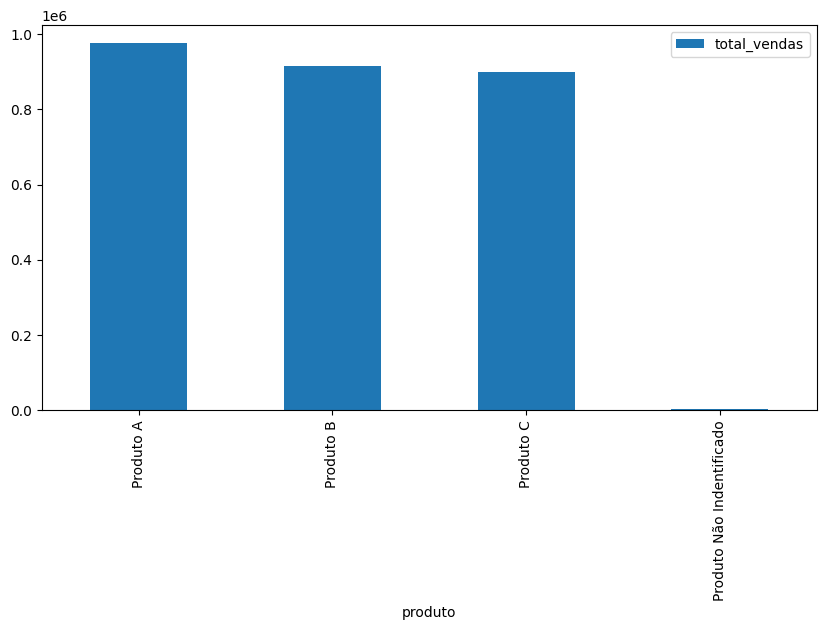

In [ ]:

df_pro.head(10).plot(kind='bar',figsize=(10,5),y='total_vendas');

In [ ]:
df_ven =df.groupby('vendedor').agg(
    total_vendas=('valor_final', 'sum'),
    total_quantidade=('quantidade', 'sum')
).sort_values(by='total_vendas', ascending=False)

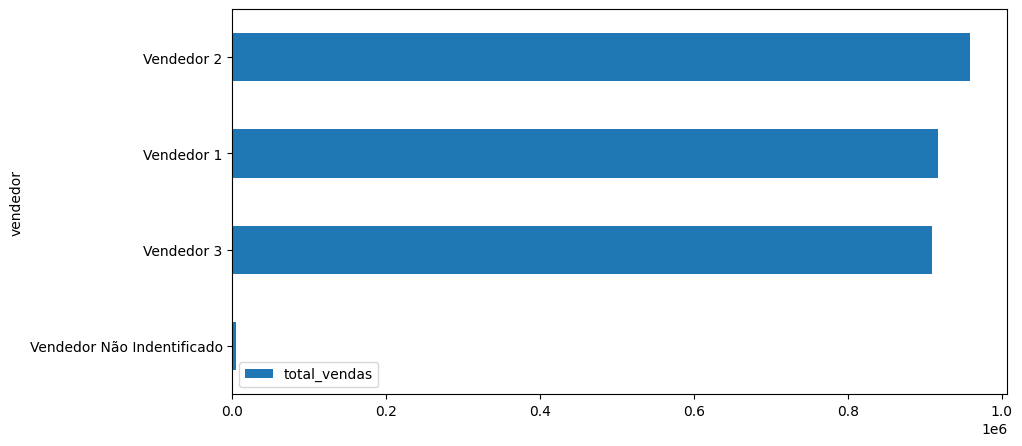

In [ ]:

df_ven.head(10).plot(kind='barh',figsize=(10,5),y='total_vendas');

In [ ]:
df_catg = df.groupby('categoria')['valor_final'].sum()

<Axes: ylabel='valor_final'>

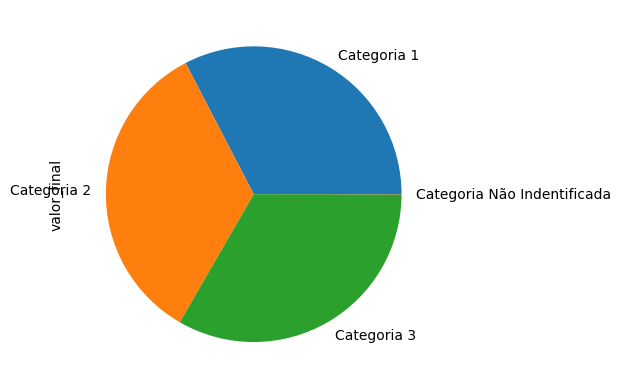

In [ ]:
df_catg.plot.pie()